# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [13]:
# Importando a biblioteca para criação de gráficos e visualizações
import matplotlib.pyplot as plt

# Importando a biblioteca para manipulação de vetores e matrizes numéricas
import numpy as np

# Importando a biblioteca para manipulação de dados em formato de tabela (dataframes)
import pandas as pd

# Importando a biblioteca para realização de testes estatísticos e cálculo de medidas descritivas
from scipy import stats

# Importando a biblioteca para realização de testes Post-hoc, como o teste de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Importando a biblioteca para realizar o teste ANOVA One-Way
from scipy.stats import f_oneway

# Importando a biblioteca para realizar o teste t de Student pareado
from scipy.stats import ttest_rel

# Importando a biblioteca para realizar o teste t de Student independente
from scipy.stats import ttest_ind

# Importando a biblioteca para criação de gráficos estatísticos com alta qualidade visual
import seaborn as sns

# Importando a biblioteca para ajuste de modelos estatísticos e realização de testes de hipóteses. 
import statsmodels.api as sm


In [14]:
ideb = pd.read_csv('ideb 2.csv')

In [15]:
ideb = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [16]:
ideb.shape

(130194, 6)

In [17]:
# Verificando se há dados faltantes no DataFrame ideb
missing_values = ideb.isna().sum()
print("Valores faltantes em cada coluna:\n", missing_values)

#ideb = ideb.dropna()

# Verificando a estrutura do DataFrame ideb
print("\nInformações sobre o DataFrame result:")
ideb.info()

Valores faltantes em cada coluna:
 ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

Informações sobre o DataFrame result:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130194 entries, 0 to 130193
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          130194 non-null  int64  
 1   sigla_uf                     130194 non-null  object 
 2   taxa_aprovacao               103458 non-null  float64
 3   nota_saeb_matematica         88345 non-null   float64
 4   nota_saeb_lingua_portuguesa  88345 non-null   float64
 5   ideb                         100369 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ MB


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [18]:
ideb_2005 = ideb.loc[ideb['ano'] == 2005,'taxa_aprovacao'].dropna()

In [19]:
# Realizando o teste de hipótese
resultado_teste = stats.ttest_1samp(ideb_2005, popmean=78, alternative='two-sided')

# Exibindo o resultado
print(resultado_teste)

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)


Comentário: No caso apresentado, a estatística t do teste é de 20.890080427394643, o valor de p é muito baixo (3.1469508067020596e-95), o que sugere forte evidência contra a hipótese nula de que a média da taxa de aprovação é igual a 78. 

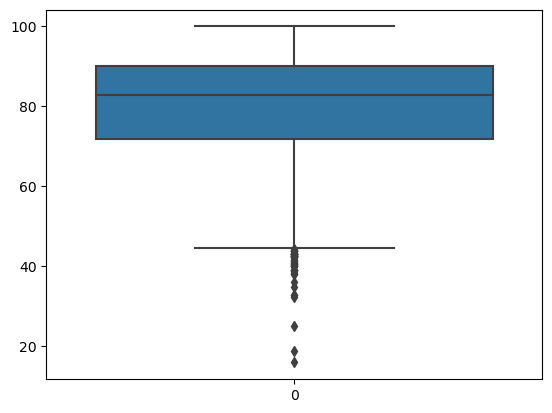

count    12083.000000
mean        80.330771
std         12.264414
min         16.000000
25%         71.800000
50%         82.800000
75%         90.100000
max        100.000000
Name: taxa_aprovacao, dtype: float64


In [20]:
# Criar o boxplot usando o Seaborn
sns.boxplot(ideb_2005)
plt.show()

# Calcula o resumo dos dados
resumo = ideb_2005.describe()

# Imprime o resumo dos dados
print(resumo)

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [21]:
# Criar um DataFrame auxiliar com os dados referentes a 2019
ideb_2019 = ideb[ideb['ano'] == 2019]

In [22]:
# Selecionar os valores de IDEB apenas para o estado do Rio Grande do Sul
ideb_rs = ideb_2019[ideb_2019['sigla_uf'] == 'RS']['ideb'].dropna()

# Selecionar os valores de IDEB apenas para o estado do Ceará
ideb_ce = ideb_2019[ideb_2019['sigla_uf'] == 'CE']['ideb'].dropna()

In [23]:
# Realizar o teste t de duas amostras para médias não pareadas
resultado_teste = ttest_ind(ideb_rs, ideb_ce, equal_var=False)

# Exibir o resultado
print(resultado_teste)

Ttest_indResult(statistic=-3.9541302761146584, pvalue=8.673400907588078e-05)


Comentário: No caso, o valor do p-valor foi muito baixo (0.00008673400907588078), o que nos leva a rejeitar a hipótese nula de que as médias do IDEB para os estados do Rio Grande do Sul e do Ceará em 2019 são iguais, com um nível de confiança de 95%. Podemos concluir, portanto, que há evidência significativa de que as médias são diferentes.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

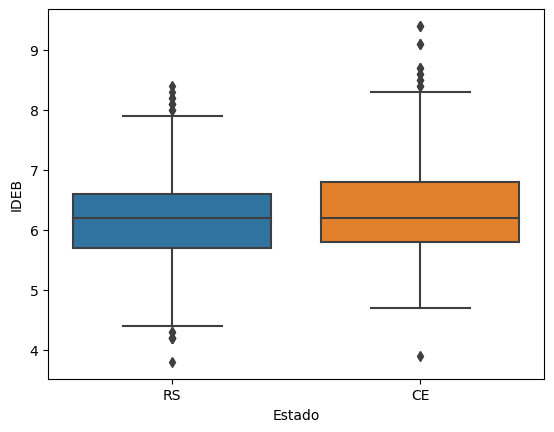

Estado          CE           RS
count   373.000000  1117.000000
mean      6.356836     6.158818
std       0.870785     0.728408
min       3.900000     3.800000
25%       5.800000     5.700000
50%       6.200000     6.200000
75%       6.800000     6.600000
max       9.400000     8.400000


In [27]:
# Criar um DataFrame com os valores dos IDEBs para os dois estados
df_boxplot = pd.DataFrame({'Estado': ['RS'] * len(ideb_rs) + ['CE'] * len(ideb_ce), 'IDEB': list(ideb_rs) + list(ideb_ce)})

# Criar o boxplot usando o Seaborn
sns.boxplot(x='Estado', y='IDEB', data=df_boxplot)
plt.show()

# Calcular o resumo dos dados
resumo = df_boxplot.groupby('Estado')['IDEB'].describe().T

# Imprime o resumo dos dados
print(resumo)

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [28]:
# Criar um DataFrame auxiliar com os dados referentes a 2005
ideb_2005 = ideb.loc[ideb['ano'] == 2005,['ideb']].dropna().head(n=300)

# Criar um DataFrame auxiliar com os dados referentes a 2019
ideb_2019 = ideb.loc[ideb['ano'] == 2019,['ideb']].dropna().head(n=300)

In [29]:
# Realizar o teste t de duas amostras para médias pareadas
resultado_teste = ttest_rel(ideb_2005, ideb_2019)

# Exibir o resultado
print(resultado_teste)

TtestResult(statistic=array([-163.87518962]), pvalue=array([8.32973437e-295]), df=array([299]))


No caso, o valor do p-valor foi muito baixo (2.5513488 x 10^-83), o que nos leva a rejeitar a hipótese nula de que as médias do IDEB para os anos de 2005 e 2019 são iguais, com um nível de confiança de 95%. Podemos concluir, portanto, que há evidência significativa de que as médias são diferentes. A estatística t negativa indica que a média do IDEB em 2019 é significativamente maior do que em 2005.

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

In [98]:
# Selecionar apenas os valores de IDEB dos dois anos de interesse
ideb_2005 = ideb_2005['ideb'].values
ideb_2019 = ideb_2019['ideb'].values

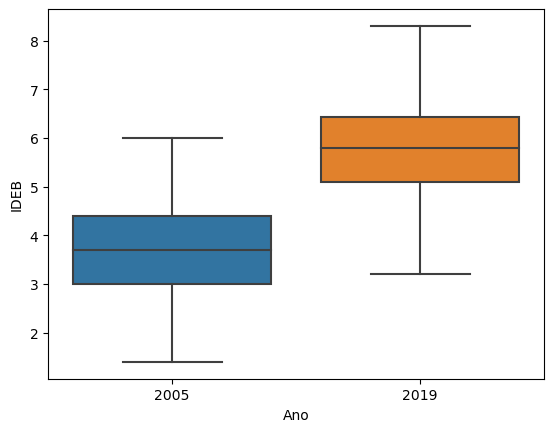

In [99]:
# Criar um DataFrame com os valores dos IDEBs para os dois anos
df_boxplot = pd.DataFrame({'Ano': ['2005'] * len(ideb_2005) + ['2019'] * len(ideb_2019), 'IDEB': list(ideb_2005) + list(ideb_2019)})

# Criar o boxplot usando o Seaborn
sns.boxplot(x='Ano', y='IDEB', data=df_boxplot)

plt.show()

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [100]:
# Criar um DataFrame auxiliar com os dados referentes aos estados da região sul em 2019
df_idem_sul = ideb.loc[(ideb['ano'] == 2019) & ((ideb['sigla_uf'] == 'PR') | 
                                                (ideb['sigla_uf'] == 'SC') | 
                                                (ideb['sigla_uf'] == 'RS'))].dropna()

# Criar um DataFrame auxiliar para o estado do Paraná
df_idem_pr = df_idem_sul[df_idem_sul['sigla_uf'] == 'PR']

# Criar um DataFrame auxiliar para o estado de Santa Catarina
df_idem_sc = df_idem_sul[df_idem_sul['sigla_uf'] == 'SC']

# Criar um DataFrame auxiliar para o estado do Rio Grande do Sul
df_idem_rs = df_idem_sul[df_idem_sul['sigla_uf'] == 'RS']

In [101]:
from scipy.stats import f_oneway

# Selecionar apenas os valores de IDEB de cada um dos três dataframes auxiliares
ideb_pr = df_idem_pr['ideb'].values
ideb_sc = df_idem_sc['ideb'].values
ideb_rs = df_idem_rs['ideb'].values

# Realizar o teste de ANOVA One-Way
resultado_teste = f_oneway(ideb_pr, ideb_sc, ideb_rs)

# Exibir o resultado
print(resultado_teste)

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)


No caso, o valor do p-valor foi muito baixo (1.2331589284254783 x 10^-12), o que nos leva a rejeitar a hipótese nula de que as médias do IDEB para os três estados da região sul em 2019 são iguais, com um nível de confiança de 95%. Podemos concluir, portanto, que há evidência significativa de que as médias são diferentes. A estatística F positiva indica que pelo menos uma das médias dos grupos é significativamente diferente das outras.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

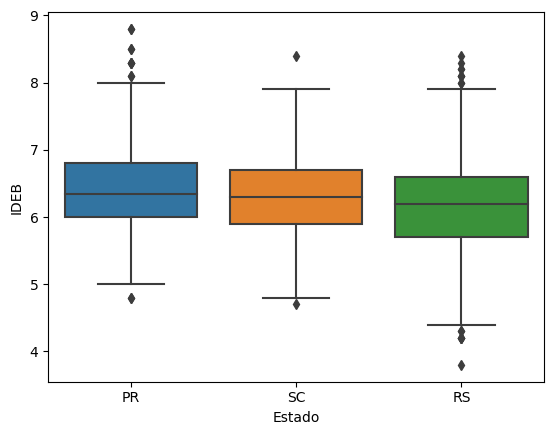

In [102]:
# Criar um DataFrame com os valores do IDEB para os três estados
df_boxplot = pd.DataFrame({'Estado': ['PR'] * len(ideb_pr) + ['SC'] * len(ideb_sc) + ['RS']
                           * len(ideb_rs), 'IDEB': list(ideb_pr) + list(ideb_sc) + list(ideb_rs)})

# Criar o boxplot utilizando o Seaborn
sns.boxplot(x='Estado', y='IDEB', data=df_boxplot)

plt.show()

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [103]:
# Realizar o teste de Tukey para verificar quais estados apresentam médias de IDEB significativamente diferentes
tukey_teste = pairwise_tukeyhsd(df_idem_sul['ideb'], df_idem_sul['sigla_uf'])

# Exibir o resultado do teste de Tukey
print(tukey_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------


O boxplot gerado na Atividade 9 ajuda a visualizar melhor essas diferenças entre as médias dos estados. Podemos ver que a mediana do IDEB do Paraná e de Santa Catarina é mais alta do que a do Rio Grande do Sul, o que é consistente com o resultado do teste de Tukey.

Em resumo, o teste Post-hoc com o teste de Tukey permite verificar quais grupos são significativamente diferentes entre si após um resultado significativo no teste de ANOVA One-Way. Neste caso, foi possível concluir que as médias de IDEB do Paraná e de Santa Catarina são diferentes da média do Rio Grande do Sul, e que as médias do Paraná e de Santa Catarina também são diferentes entre si.